In [2]:
from datasets import load_dataset

dataset_name = 'liupf/ChEBI-20-MM'
# Replace 'dataset_name' with the actual name of the dataset you want to load
dataset = load_dataset(dataset_name)



Generating train split: 26406 examples [00:00, 78992.58 examples/s]
Generating validation split: 3300 examples [00:00, 85785.31 examples/s]
Generating test split: 3300 examples [00:00, 93183.54 examples/s]


In [5]:
df_train = dataset['train'].to_pandas()
df_train

,CID,SMILES,description,polararea,xlogp,inchi,iupacname,SELFIES
0,129626631,CCCCC[C@H]1[C@H](O1)/C=C/C(C/C=C\\C/C=C\\CCCC(...,The molecule is an epoxy(hydroxy)icosatrienoat...,72.9,4.6,InChI=1S/C20H32O4/c1-2-3-9-13-18-19(24-18)16-1...,"(5Z,8Z,12E)-11-hydroxy-13-[(2R,3S)-3-pentyloxi...",None
1,6336615,[125Te],The molecule is the stable isotope of telluriu...,0.0,NaN,InChI=1S/Te/i1-3,tellurium-125,[125Te]
2,10906239,CC(=O)O[C@@H]1C[C@@H]2[C@](C=CC(=O)C2(C)C)([C@...,The molecule is a tetracyclic triterpenoid tha...,56.5,5.7,"InChI=1S/C28H36O4/c1-17(29)32-24-15-22-25(2,3)...","[(5R,7R,8R,9R,10R,13S,17R)-17-(furan-3-yl)-4,4...",[C][C][=Branch1][C][=O][O][C@@H1][C][C@@H1][C@...
3,12699,CN(C(=O)N)N=O,The molecule is a member of the class of N-nit...,75.8,0.0,"InChI=1S/C2H5N3O2/c1-5(4-7)2(3)6/h1H3,(H2,3,6)",1-methyl-1-nitrosourea,[C][N][Branch1][=Branch1][C][=Branch1][C][=O][...
4,636970,C1=CC=C2C(=C1)C(=CN2)C3=NC=CS3,The molecule is an indole phytoalexin that is ...,56.9,2.7,InChI=1S/C11H8N2S/c1-2-4-10-8(3-1)9(7-13-10)11...,"2-(1H-indol-3-yl)-1,3-thiazole",[C][=C][C][=C][C][=Branch1][Ring2][=C][Ring1][...
...,...,...,...,...,...,...,...,...
26401,90659821,CCCCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](CO[C@H]1[C@...,The molecule is a N-acyl-beta-D-galactosylsphi...,149.0,15.1,InChI=1S/C47H91NO8/c1-3-5-7-9-11-13-15-17-18-1...,"N-[(E,2S,3R)-3-hydroxy-1-[(2R,3R,4S,5R,6R)-3,4...",[C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][...
26402,51055215,C[C@H](CCN)[C@H](C(=O)O)N,The molecule is a D-alpha-amino acid that is D...,89.3,-3.2,InChI=1S/C6H14N2O2/c1-4(2-3-7)5(8)6(9)10/h4-5H...,"(2R,3R)-2,5-diamino-3-methylpentanoic acid",[C][C@H1][Branch1][Ring2][C][C][N][C@H1][Branc...
26403,71627157,CC/C=C\\C/C=C\\C/C=C\\C/C=C\\C/C=C\\C/C=C\\CCC...,The molecule is an acyl-CoA(4-) arising from d...,400.0,3.5,InChI=1S/C49H78N7O17P3S/c1-4-5-6-7-8-9-10-11-1...,"[(2R,3S,4R,5R)-5-(6-aminopurin-9-yl)-4-hydroxy...",None
26404,49792031,CCCCCCCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](COP(=O)(...,The molecule is an inositol phosphomannosylino...,422.0,10.1,InChI=1S/C64H125NO24P2/c1-3-5-7-9-11-13-15-17-...,"[(2R,3S,4S,5S)-6-[(1R,2R,3R,4R,5R,6S)-2-[[(2S,...",[C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][...


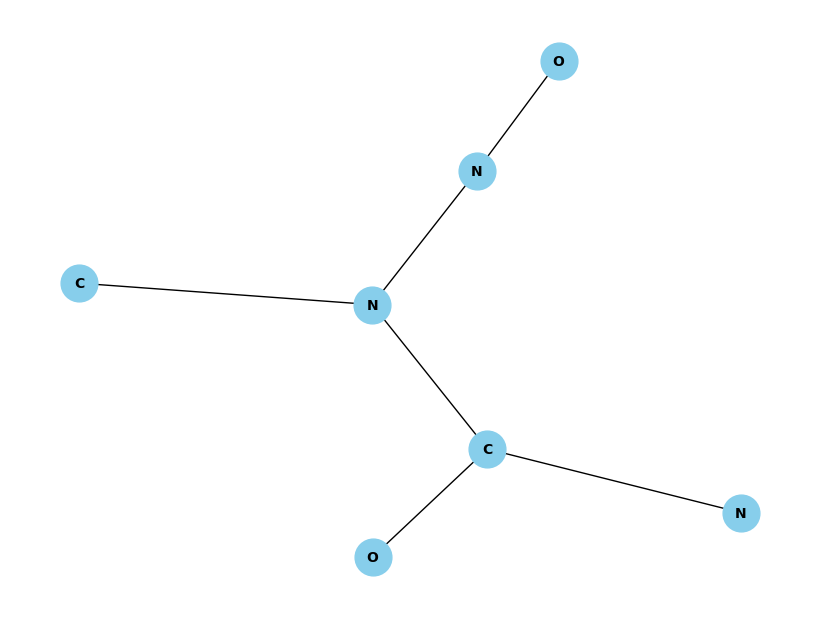

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdmolops

def smiles_to_tree(smiles):
    # Convert SMILES to RDKit molecule
    mol = Chem.MolFromSmiles(smiles)
    
    if mol is None:
        raise ValueError(f"Invalid SMILES string: {smiles}")
    
    # Get the adjacency list from the molecule
    adjacency_list = {}
    for atom in mol.GetAtoms():
        atom_idx = atom.GetIdx()
        atom_symbol = atom.GetSymbol()
        neighbors = [nbr.GetIdx() for nbr in atom.GetNeighbors()]
        
        adjacency_list[atom_idx] = {
            'symbol': atom_symbol,
            'neighbors': neighbors
        }
    
    return adjacency_list

def build_networkx_graph(adjacency_list):
    G = nx.Graph()
    
    for atom_idx, data in adjacency_list.items():
        atom_symbol = data['symbol']
        G.add_node(atom_idx, label=atom_symbol)
        
        for neighbor_idx in data['neighbors']:
            G.add_edge(atom_idx, neighbor_idx)
    
    return G

def plot_molecular_graph(G):
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
    plt.show()

# Example SMILES strings
#smiles = "CCO"  # Ethanol
smiles = "C1CCCCC1"  # Cyclohexane
smiles = df_train.iloc[3]['SMILES']
# smiles = "CC(C)C"  # Isobutane

# Convert SMILES to adjacency list
adjacency_list = smiles_to_tree(smiles)

# Build NetworkX graph
G = build_networkx_graph(adjacency_list)

# Plot the molecular graph
plot_molecular_graph(G)
